<a href="https://colab.research.google.com/github/Vatsala-18/MachineLearning/blob/main/multiLinearReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/CarPrice_Assignment.csv')    #imports dataset and creates data frame
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

CREATE ML MODEL TO PREDICT CAR PRICE

In [5]:
df['price']   #access particular column


0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [6]:
df['price'].max()

45400.0

In [7]:
df['price'].min()

5118.0

In [8]:
#DATA VISUALISATION
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


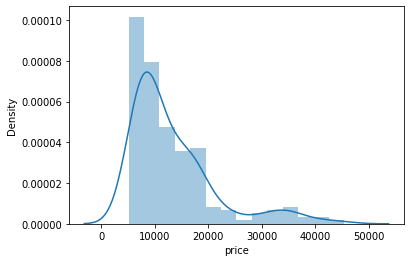

In [9]:
sns.distplot(df['price'])   #around 10000 is the economy range for the cars
plt.show()      #distplot gives histogram + line graph

In [10]:
#DATA CLEANING

In [11]:
df.shape

(205, 26)

In [12]:
#doing cleaning so want to include only numeic values 
#we are doing splicing or data cleaning

In [13]:
#df.select_dtype : it returns a subset of the dataframe's columns based on columns dtype
cars_numeric = df.select_dtypes(include =['float64','int64'])   #SKLEARN DEALS WITH NUMERIC DATA
cars_numeric

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [14]:
cars_numeric = cars_numeric.drop(['car_ID','symboling'],axis=1)   #unwanted data dropped
cars_numeric

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [15]:
cars_numeric

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [16]:
#0-13 cols are input and last column i.e price is output
#giving input
x = cars_numeric.iloc[:,0:13].values
x

array([[  88.6,  168.8,   64.1, ..., 5000. ,   21. ,   27. ],
       [  88.6,  168.8,   64.1, ..., 5000. ,   21. ,   27. ],
       [  94.5,  171.2,   65.5, ..., 5000. ,   19. ,   26. ],
       ...,
       [ 109.1,  188.8,   68.9, ..., 5500. ,   18. ,   23. ],
       [ 109.1,  188.8,   68.9, ..., 4800. ,   26. ,   27. ],
       [ 109.1,  188.8,   68.9, ..., 5400. ,   19. ,   25. ]])

In [17]:
#output
y = cars_numeric.iloc[:,13].values

In [18]:
x.ndim

2

In [19]:
y.ndim

1

In [20]:
#train test and split

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)    #predicted values should match, random_state=0
#75% data is given for training and 25% data is given for testing

In [22]:
print(x_train.shape)

(153, 13)


In [23]:
print(x_test.shape)

(52, 13)


In [24]:
x.shape

(205, 13)

In [25]:
#RUN A REGRESSOR/CLUSTERER/CLASSIFIER

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [26]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
y_pred = model.predict(x_test)    #predicting values or prices of the cars

In [28]:
y_pred

array([ 6235.42500602, 19790.61817546, 14979.27612129, -1134.1351902 ,
       11132.32548236, 13518.17757352,  5683.20921384,  6283.89365797,
       23126.98530885,  8202.87829636, 16141.08746789, 37186.620833  ,
        9399.71398237, 14235.89743835,  5757.94201887, 13165.16702932,
       11152.82221655, 18568.63307141, 10141.86686901,  6287.15927099,
       10682.51479525, 17992.19878976, 10833.41323372, 13614.7038942 ,
       21454.99910165,  8202.97012341,  6873.2042475 , 17805.91105615,
        6902.39516583,  5801.50097042,  9649.90265499, 11070.09789029,
       21045.77815857,  8246.11235138,  5936.63781937, 26615.14377317,
       10378.97946806, 16778.39190457,  6689.66441559, 37043.76928874,
        5661.41569819, 15623.82529796, 30395.98293889, 17901.79311012,
       11439.71150878,  7274.32045138,  6977.32359472, 15485.01565233,
       10277.75067436,  9831.92371684, 18843.28365874,  6807.29317223])

In [29]:
y_test

array([ 6795. , 15750. , 15250. ,  5151. ,  9995. , 11199. ,  5389. ,
        7898. , 17199. ,  6529. , 20970. , 31400.5, 10945. , 18344. ,
        8916.5,  9989. ,  9295. , 18920. ,  7895. ,  6488. ,  9959. ,
       15580. ,  9895. , 11549. , 15998. ,  5118. ,  6938. , 16695. ,
        8358. ,  5499. ,  7975. , 12290. , 22018. ,  8948. ,  6849. ,
       41315. , 11595. , 18150. ,  6377. , 45400. ,  8916.5, 17450. ,
       34184. , 15040. , 11259. ,  7609. ,  7609. , 14869. , 11694. ,
        8495. , 23875. ,  7099. ])

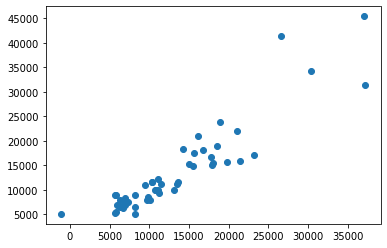

In [30]:
plt.scatter(y_pred,y_test)

In [31]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8387970914426268

In [32]:
#model is complete

In [33]:
#Now let's see few plots which we can do using 

In [34]:
df1 = pd.DataFrame({'Actual Price' : y_test, 'Predicted Price' : y_pred})   #created a new dataframe
df1

,Actual Price,Predicted Price
0,6795.0,6235.425006
1,15750.0,19790.618175
2,15250.0,14979.276121
3,5151.0,-1134.135190
4,9995.0,11132.325482
5,11199.0,13518.177574
6,5389.0,5683.209214
7,7898.0,6283.893658
8,17199.0,23126.985309
9,6529.0,8202.878296


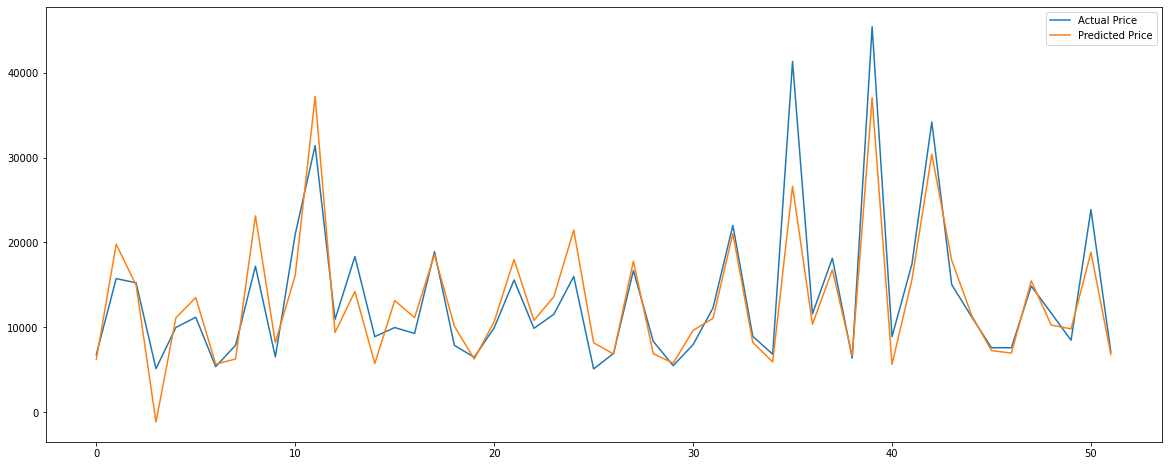

In [35]:
df1.plot(figsize=(20,8))    #pandas plotting to show the prices
plt.show()

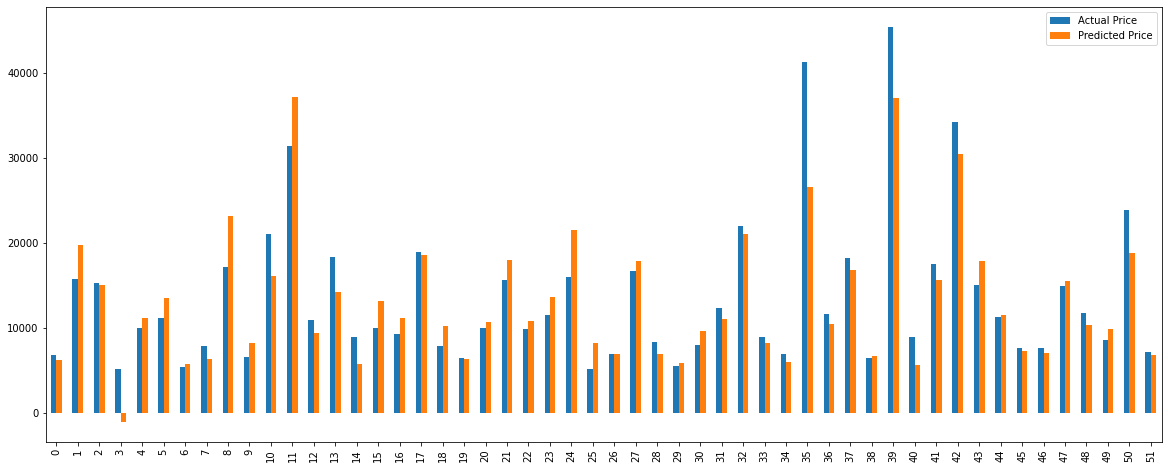

In [36]:
df1.plot(figsize=(20,8),kind='bar')    #pandas plotting to show the prices
plt.show()

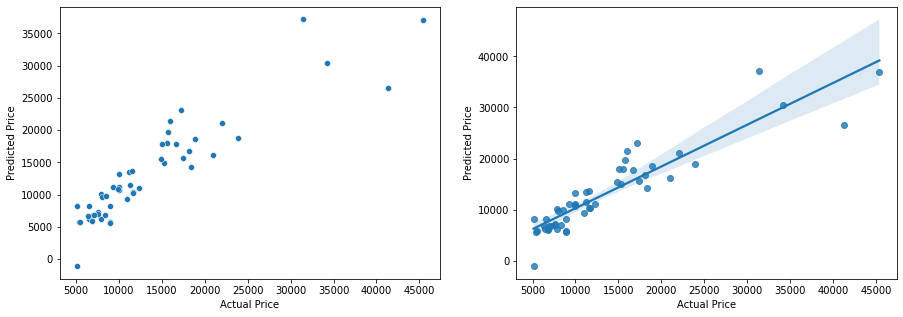

In [37]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.scatterplot(x='Actual Price',y='Predicted Price', data = df1)

plt.subplot(1,2,2)
sns.regplot(x='Actual Price',y='Predicted Price', data = df1)

SERIALIZATION - saving of data , 
DESERIALIZATION - restoring of data

In [38]:
#pickle - it is a fundamental but powerful algorithm for serializing and deserializing data

In [39]:
#pickle.dump
#pickle.load

In [42]:
#serialization
import pickle  #importing pickle library
pickle.dump(model,open('abc.pkl','wb'))  #creates a pkl file    #wb -write byte